# <center>Metody Numeryczne</center>

# Laboratorium 8: Rozwiązywanie równań nieliniowych


**Wykonał:** \<Paweł Krok\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest poznanie numerycznych metod rozwiązywania układów równań nieliniowych. W ramach laboratorium przedstawione zostaną metody: [*bisekcji*](https://www.wikiwand.com/pl/articles/Metoda_r%C3%B3wnego_podzia%C5%82u), [*siecznych*](https://www.wikiwand.com/pl/articles/Metoda_siecznych) oraz [*Newtona*](https://www.wikiwand.com/pl/articles/Metoda_Newtona).

Tematem wiodącym podczas tych zajęć będzie poszukiwanie miejsc zerowych funkcji zdefiniowanej w następujący sposób: 
$$ 
f(x) = e^{-2x} + x^2 - 1 
$$

Funkcja $f(x)$ oraz jej pierwsza i druga pochodna ($f'(x)$, $f''(x)$) zostały zaimplementowane w pliku `main.py`, odpowiednio jako `func()`, `dfunc()` i `ddfunc()`.

### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [5]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize as sp_opt
import time

---

### **Zadanie 1.**

1. Zaprezentuj na jednym wykresie przebieg funkcji $f(x)$, $f'(x)$ oraz $f''(x)$, w taki sposób, aby na podstawie rysunku można było zgrubnie określić położenie miejsc zerowych funkcji.

2. Na podstawie analizy wykresu określ przedziały, w których znajdują się miejsca zerowe funkcji $f(x)$.

3. Odpowiedz w jaki sposób (wykorzystując pierwszą i drugą pochodną) można znaleźć miejsca zerowe funkcji.


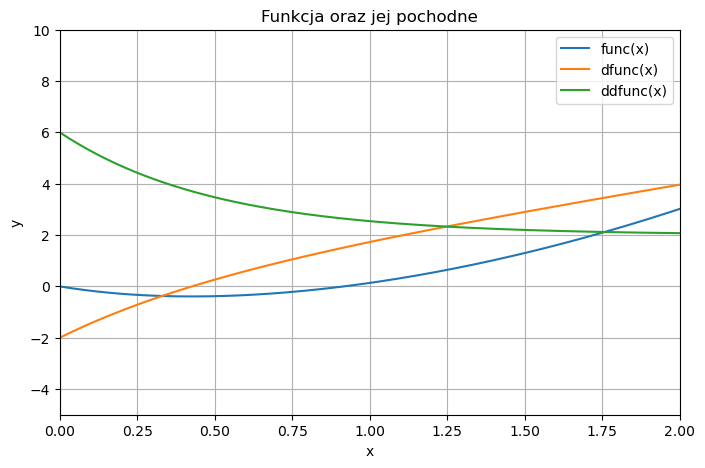

In [9]:
# ===== Twoja implementacja tutaj =====
x = np.linspace(0, 10, 1000)
y = main.func(x)
y_prime = main.dfunc(x)
y_double_prime = main.ddfunc(x)

plt.figure(figsize=(8, 5))

plt.plot(x, y, label="func(x)")
plt.plot(x, y_prime, label="dfunc(x)")
plt.plot(x, y_double_prime, label="ddfunc(x)")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Funkcja oraz jej pochodne")
plt.grid(True)
plt.legend()
plt.xlim(0,2)
plt.ylim(-5,10)

plt.show()

# 2 - widać że miejsca zerowe to 0, oraz około 0.8, do tego drugiego wystarczy nam przedział [0.75,1]
# 3 - w miejscu przeciecia osi x przez 1 pochodna funkcja zaczyna rosnąć, 
# mogło by nam to pomóc, gdyby miejsca zerowe były mniej widoczne

---

### **Zadanie 2.**

Najprostszą metodą do wyznaczenia miejsc zerowych funkcji nieliniowej jest [metoda bisekcji](https://en.wikipedia.org/wiki/Bisection_method). 

Zaimplementuj funkcję *`bisection()`* pamiętając, że gwarancją zbieżności metody bisekcji dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

---

### **Zadanie 3.**

Bardziej zaawansowaną metodą wyznaczania miejsc zerowych jest [metoda siecznych](https://en.wikipedia.org/wiki/Secant_method), która stanowi rozwinięcie [metody Regula Falsi](https://en.wikipedia.org/wiki/Regula_falsi).

Zaimplementuj funkcję *`secant()`* pamiętając, że gwarancją zbieżności metody siecznych dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

3. Pierwsza i druga pochodna funkcji $f(x)$ są ciągłe w przedziale domkniętym $[a,b]$.

4. Pierwsza i druga pochodna funkcji $f(x)$ w przedziale domkniętym $[a, b]$ mają stały znak i są różne od zera.


---

### **Zadanie 4.**

Inną metodą, wykorzystywaną do poszukiwania miejsc zerowych funkcji, jest [metoda Newtona](https://en.wikipedia.org/wiki/Newton%27s_method), nazywana również metodą stycznych.

**Podpunkt 1.**

Algorytm metody Newtona wykorzystuje wartości pierwszej pochodnej, dlatego przed przystąpieniem do jej implementacji przygotuj pomocniczą funkcję *`difference_quotient()`*, służącą do wyznaczenia wartości ilorazu różnicowego.

<br>

**Podpunkt 2.**

Zaimplementuj funkcję *`newton()`* pamiętając, że gwarancją zbieżności metody Newtona dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

3. Pierwsza i druga pochodna funkcji $f(x)$ są ciągłe w przedziale domkniętym $[a,b]$.

4. Pierwsza i druga pochodna funkcji $f(x)$ w przedziale domkniętym $[a, b]$ mają stały znak i są różne od zera.

---

### **Zadanie 5.**

Dla funkcji $f(x)$ zdefiniowanej w sekcji **Cel zajęć** znajdź miejsca zerowe przy użyciu:

- funkcji [`sp.optimize.root()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html).
- funkcji [`sp.optimize.fsolve()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html).

In [ ]:
# ===== Twoja implementacja tutaj =====
f = main.func

roots = {}

x0_zero = 0.5 

root_result_1 = sp_opt.root(f, 0.1) # W pobliżu x=0
roots['root_1'] = root_result_1.x[0]

fsolve_result_1 = sp_opt.fsolve(f, x0_zero)
roots['fsolve_1'] = fsolve_result_1[0]

x0_one = 1.0

root_result_2 = sp_opt.root(f, x0_one)
roots['root_2'] = root_result_2.x[0]

fsolve_result_2 = sp_opt.fsolve(f, x0_one)
roots['fsolve_2'] = fsolve_result_2[0]

print("--- Zadanie 5: Wyniki sp.optimize ---")
print(f"Pierwiastek 1 (blisko 0): {roots['root_1']:.12f}")
print(f"Pierwiastek 2 (blisko 1): {roots['fsolve_2']:.12f}")

# =======================================


--- Zadanie 5: Wyniki sp.optimize ---
Pierwiastek 1 (blisko 0): -0.000000000000
Pierwiastek 2 (blisko 1): 0.916562583106


---

### **Zadanie 6.**

Korzystając z przedziałów wyznaczonych w **Zadaniu 1.** znajdź miejsca zerowe funkcji $f(x)$ zdefiniowanej w sekcji **Cel zajęć**, przy użyciu:

- metody bisekcji,
- metody siecznych,
- metody Newtona,

z tolerancją równą $1\mathrm{e}{-10}$.

Zbadaj dokładność (względem rozwiązania z **Zadania 5.**) i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach. 


--- Zadanie 6: Porównanie Metod (dla pierwiastka ok. 0.916) ---
Metoda: Bisekcji   | Iteracje: 31  | Czas: 0.000113 s | Dokładność (błąd): 4.09e-11
Metoda: Siecznych  | Iteracje: 9   | Czas: 0.000038 s | Dokładność (błąd): 2.02e-11
Metoda: Newtona    | Iteracje: 4   | Czas: 0.000033 s | Dokładność (błąd): 9.09e-14


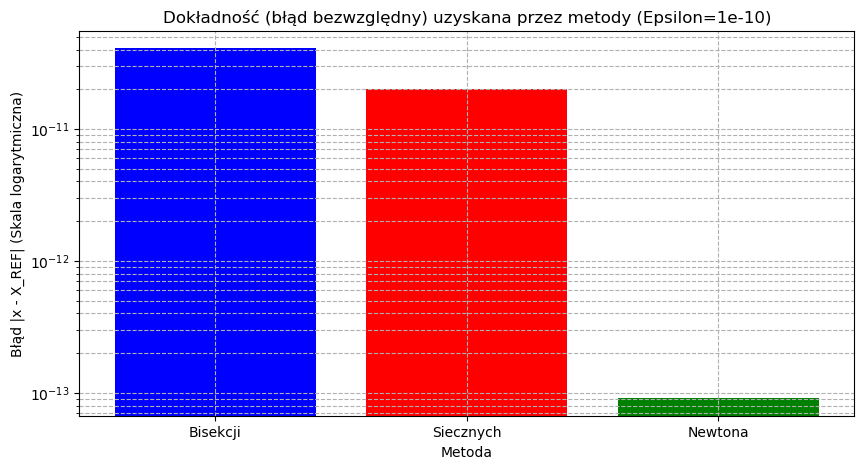

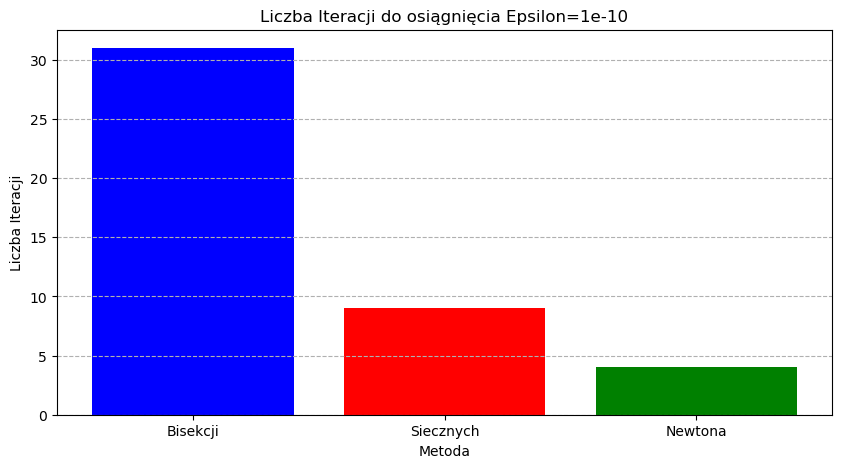

In [ ]:
# ===== Twoja implementacja tutaj =====

X_REF = 0.9165625831056072 
EPSILON = 1e-10

methods = [
    ("Bisekcji", main.bisection),
    ("Siecznych", main.secant),
    ("Newtona", main.newton),
]

# Dane do zebrania (dla pierwiastka 2, który jest trudniejszy)
data = []
a, b = 0.5, 1.0

print("\n--- Zadanie 6: Porównanie Metod (dla pierwiastka ok. 0.916) ---")

for name, method in methods:
    start_time = time.perf_counter()
    
    if name == "Newtona":
        result = method(main.func, main.dfunc, main.ddfunc, a, b, EPSILON, 100)
    else:
        result = method(a, b, main.func, EPSILON, 100)
        
    end_time = time.perf_counter()
    
    if result is not None:
        root, iters = result
        time_elapsed = end_time - start_time
        accuracy = abs(root - X_REF)
        data.append({
            'method': name,
            'root': root,
            'iters': iters,
            'time': time_elapsed,
            'accuracy': accuracy
        })
        print(f"Metoda: {name:<10} | Iteracje: {iters:<3} | Czas: {time_elapsed:.6f} s | Dokładność (błąd): {accuracy:.2e}")
    else:
        print(f"Metoda: {name:<10} | Nie zbiegła.")


# -------------------------------------------------------------
# Rysowanie wykresów (Dokładność vs Liczba Iteracji)
# -------------------------------------------------------------

if data:
    methods_list = [d['method'] for d in data]
    iters_list = [d['iters'] for d in data]
    accuracy_list = [d['accuracy'] for d in data]
    
    # Wykres 1: Dokładność (Błąd)
    plt.figure(figsize=(10, 5))
    plt.bar(methods_list, accuracy_list, color=['blue', 'red', 'green'])
    plt.yscale('log')
    plt.title('Dokładność (błąd bezwzględny) uzyskana przez metody (Epsilon=1e-10)')
    plt.ylabel(f'Błąd |x - X_REF| (Skala logarytmiczna)')
    plt.xlabel('Metoda')
    plt.grid(True, which="both", ls="--")
    plt.show()

    # Wykres 2: Czas vs Iteracje
    plt.figure(figsize=(10, 5))
    plt.bar(methods_list, iters_list, color=['blue', 'red', 'green'])
    plt.title(f'Liczba Iteracji do osiągnięcia Epsilon={EPSILON}')
    plt.ylabel('Liczba Iteracji')
    plt.xlabel('Metoda')
    plt.grid(axis='y', ls="--")
    plt.show()

# =======================================


---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)